#TP NETFLIX_CHONA

In [175]:
import pandas as pd #importsmod todas las librerias que vamos a utilizar
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
from datetime import datetime
import seaborn as sns

In [174]:
uploaded = files.upload()

Saving NetflixHistory.csv to NetflixHistory (3).csv


**Ejercicio A**

In [176]:
chona = pd.read_csv('NetflixHistory.csv') #declaramos chona, y que va a contener la info del .CSV
devices = chona['Device Type']
value_list = ['Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick'] #ignoramos estos dispositivos
def dispositivos(disp):
  return disp not in value_list

chona = chona[devices.apply(dispositivos)]

chona['Device Type'].value_counts()
chona['Device Type'][0] #mostramos el dispositivo con el que más títulos se reprodujeron

'Apple Apple TV 4 Apple TV'

**Ejercicio B**

In [177]:
def onlySeries(titulo): #definimos la funcion de solo series
  puntos ='Capítulo'
  serie=""
  if puntos not in titulo:
    serie = titulo
  return serie in puntos

def onlyPelis(titulo): #definimos la funcion de solo peliculas
  puntos = 'Capítulo'
  peli = ""
  if puntos in titulo:
    peli = titulo
  return peli in puntos

peliculas = chona[chona['Title'].apply(onlyPelis)] #aplicamos la funcion a chona, para obtener las peliculas dentro de este
series = chona[chona['Title'].apply(onlySeries)] #aplicamos la funcion a chona, para obtener las series dentro de este

firstPartSeries = lambda t: t.split(':')[0] #Con esta funcion lambda obtenemos el nombre de la serie
seriesOnly = series['Title'].apply(firstPartSeries) #aplicamos la funcion a series, para obtener unicamente el nombre de las series y lo guardamos en seriesOnly, haciendo referencia a que solo estamos guardando el nombre de las series y no sus respectivos capitulos


#Pelicula por ocurrencias
maxPeliculaTimes = peliculas['Title'].value_counts().head(1)
print(maxPeliculaTimes.to_frame())

#Pelicula por duracion
maxPelicula = peliculas.sort_values(by=['Duration'], ascending=[False]).head(1)
maxPelicula.filter(['Title', 'Duration'])

                                   Title
Star Wars: El Imperio contraataca      7


,Title,Duration
8127,El club de la pelea,02:20:11



**Ejercicio C i)**

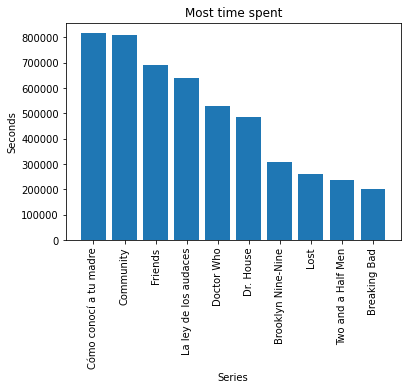

                        Time: seconds
Cómo conocí a tu madre         816931
Community                      807438
Friends                        690936
La ley de los audaces          637377
Doctor Who                     530325
Dr. House                      485376
Brooklyn Nine-Nine             306755
Lost                           262502
Two and a Half Men             235533
Breaking Bad                   202188


In [178]:
def get_sec(time_str): #obtenemos el tiempo en segundos
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

seriesDuration = {}
titles=''

for i in series.index:
  titles = (series['Title'][i].split(':'))[0]
  if titles not in seriesDuration:
    seriesDuration[titles] = get_sec(series['Duration'][i])
  else:
    seriesDuration[titles] += get_sec(series['Duration'][i])

graph = {}

n=10
for j in range(n):
  graph[max(seriesDuration, key=seriesDuration.get)] = seriesDuration[max(seriesDuration, key=seriesDuration.get)]
  seriesDuration[max(seriesDuration, key=seriesDuration.get)] = 0
plt.bar(graph.keys(), graph.values())

plt.xlabel('Series') #declaramos las labels en X y en Y, ademas del title
plt.ylabel('Seconds')
plt.title('Most time spent')
plt.xticks(rotation = 90)
plt.show() #mostramos el grafico

seriesDf = pd.DataFrame(graph.values(), graph.keys(), columns = ['Time: seconds']) #creamos un nuevo dataframe para poner el top N de tiempo visto
seriesDf.head(n) #ponemos que el top N sea en base al valor de N
print(seriesDf) #printeamos el Top

**Ejercicio C ii)**

,Title
Community,870
Cómo conocí a tu madre,780
Friends,604
Dr. House,346
La ley de los audaces,330
Brooklyn Nine-Nine,314


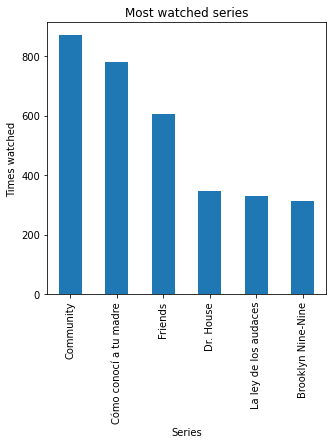

In [179]:
seriesOnly['Series name'] = seriesOnly #creamos series name

n = 6
def timesWatched(data):
  timesSeen = seriesOnly['Series name'].value_counts().head(n)
  grafico = timesSeen.plot(kind = 'bar', figsize=(5,5))
  plt.title('Most watched series') #declaramos las labels en X y en Y, ademas del title
  plt.xlabel('Series')
  plt.ylabel('Times watched')
  return(timesSeen.to_frame())
timesWatched(series) #aplicamos la funcion a series

**Ejercicio D**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


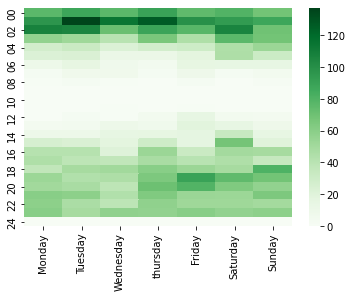

In [180]:
hours = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09','10','11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'] #guardamos las horas
week = ['Monday', 'Tuesday', 'Wednesday', 'thursday', 'Friday', 'Saturday', 'Sunday'] #guardamos los dias de las semanas

#creamos un dataframe nuevo
newDf = pd.DataFrame(index=hours, columns=week)

#poner todos los valores en 0 para que no tire error ni nulo
for col in newDf.columns:
  newDf[col].values[:] = 0

for days in chona['Start Time']:
  dayWeek = (days.split('-'))[0] + '-' + (days.split('-'))[1] + '-' +((days.split('-'))[2]).split()[0]
  dayWeek = datetime.strptime(dayWeek,"%Y-%m-%d")
  dayWeek = week[dayWeek.weekday()]
  hour = ((days.split('-')[2]).split()[1]).split(':')[0]
  newDf[dayWeek][hour] +=1

newDf = newDf.astype(np.float)
heatMap = sns.heatmap(newDf,cmap="Greens")

**Ejecicio E**

,Year
2015,1191
2020,1016
2018,916
2016,807
2017,795
2021,722
2019,550
2022,294


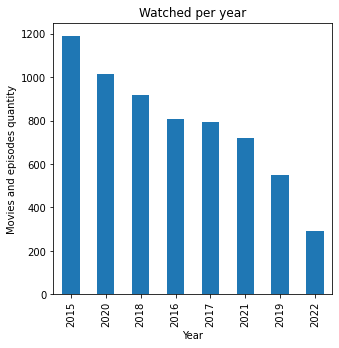

In [181]:
firstPart = lambda t: t.split('-')[0] #con esta funcion lambda obtenemos la primer parte de la separacion por el guion, la cual vamos a utilizar para obtener la primer parte de Start Time, o el año en el que chona vio la pelicuala/serie
chona['Year'] = chona['Start Time'].apply(firstPart).to_frame() #se la aplicamos a chona['Start time'] para obtener el año en que fue vista la pelicula/serie, y declaramos la columna Year, la cual va a guardar dicha informacion
chona.sort_values(by=['Year'],ascending=[False])
chona.filter(["Title", "Year"])

perYear = chona['Year'].value_counts() #declaramos perYear, la cual cuenta cuantas veces se repite cada año, es decir cuantas peliculas/capitulos de una serie vio chona por año

def watchedPerYear(watched): #creamos la funcion watchedPerYear
  graph = perYear.plot(kind = 'bar', figsize=(5,5))
  plt.title('Watched per year')#declaramos las labels en X y en Y, ademas del title
  plt.xlabel('Year')
  plt.ylabel('Movies and episodes quantity')
  return(perYear.to_frame())
watchedPerYear(perYear) #aplicamos la funcion watchedPerYear a perYear

**Ejercicio F**

In [182]:
chona['Duration'] = pd.to_timedelta(chona['Duration']) #usamos to_timedelta para poder asi mostrar el mensaje de cuantos dias estuvo Chona viendo series/peliculas :)
print('Chona has watched movies and series for ' + str(chona['Duration'].sum())) #y lo mostramos :)

Chona has watched movies and series for 99 days 18:44:34
